In [1]:
from gensim.models import Word2Vec 
model = Word2Vec.load_word2vec_format('/home/dima/Data/word2vec.bin', binary=True)

In [26]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.cm as cm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [30]:
def get_tweet_vector(text):
    words = [ w for w in text.lower().split() if w in model]
    N = len(words)
    vector = np.zeros(300)
    
    if N > 0:
        for word in words:
             vector += model[word]
        vector /= N
    return vector

In [6]:
data = pd.read_csv('/home/dima/Data/sentiment_manual_train_data_clean.csv')

In [8]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Text,Sentiment,Text_clean,Sentiment
0,0,0,@SouthwestAir thanks for an awesome flight and...,positive,USER_MENTION_USER thanks for an awesome flight...,1
1,1,1,@USAirways unacceptable. You knew the pilot wo...,negative,USER_MENTION_USER unacceptable. you knew the p...,-1
2,2,2,@AmericanAir how can I get you guys to respond...,negative,USER_MENTION_USER how can i get you guys to re...,-1
3,3,3,@VirginAmerica lost my luggage 4 days ago on f...,negative,USER_MENTION_USER lost my luggage 4 days ago o...,-1
4,4,4,@united is it on a flight now? Thanks for reply.,neutral,USER_MENTION_USER is it on a flight now? thank...,0


In [31]:
X = []
Y = []
for i in range(len(data)):
    try:
       tweet_vector = get_tweet_vector(data['Text_clean'][i])
       tweet_sentiment = int(data['Sentiment'][i])
       X.append(tweet_vector)
       Y.append(tweet_sentiment)
    except:
        pass
X = np.array(X)
Y = np.array(Y)
print 'Shape X: ' + str(X.shape)
print 'Shape Y: ' + str(Y.shape)

Shape X: (29114, 300)
Shape Y: (29114,)


In [35]:
X_pca = PCA(n_components=2).fit_transform(X)

In [36]:
colors = []
for i in Y:
    if Y[i] == -1: colors.append('r')
    if Y[i] == 1: colors.append('g')
    if Y[i] == 0: colors.append('b')




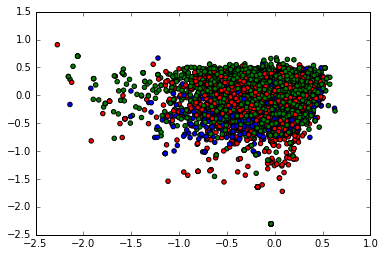

In [37]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=colors, cmap=plt.cm.spectral)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)